# INTRODUCTION

1. Read datas
2. Poverty rate of each state
3. Most common 15 Name or Surname of killed people
4. High school graduation rate of the population that is older than 25 in states
5. Percentage of state's population according to races that are black,white,native american, asian and hispanic
6. High school graduation rate vs Poverty rate of each state
7. Kill properties
    - Manner of death
    - K11ill weapon
    - Age of killed people
    - Race of killed people
    - Most dangerous cities
    - Most dangerous states
    - Having mental ilness or not for killed people
    - Threat types
    - Flee types
    - Having body cameras or not for police
8. Race rates according to states in kill data
9. Kill numbers from states in kill data
10. Plotly Visualization Tutorial: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners

Plot Contents:

11. Bar Plot
12. Point Plot
13. Joint Plot
14. Pie Chart
15. Lm Plot
16. Kde Plot
17. Violin Plot
18. Heatmap
19. Box Plot
20. Swarm Plot
21. Pair Plot
22. Count Plot

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import warnings
warnings.filterwarnings('ignore') 

##from subprocess import check_output
##print(check_output(["ls", "input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [2]:
#Read Data

median_house_hold_in_come = pd.read_csv('input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('input/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('input/PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [4]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [5]:
percentage_people_below_poverty_level.poverty_rate.value_counts() #1464 adet 0 ve 201 - girdisi var. Bunlar anlamsız olduğundan 0'a eşitleyeceğiz

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [18]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

## Bar Plot

In [19]:
[percentage_people_below_poverty_level['Geographic Area']=='AL']

[0         True
 1         True
 2         True
 3         True
 4         True
          ...  
 29324    False
 29325    False
 29326    False
 29327    False
 29328    False
 Name: Geographic Area, Length: 29329, dtype: bool]

In [20]:
percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']=='AL']

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0
...,...,...,...
580,AL,Woodland town,26.6
581,AL,Woodstock town,13.5
582,AL,Woodville town,25.9
583,AL,Yellow Bluff town,44.1


In [21]:
percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']=='AL'].poverty_rate

0      78.8
1      29.1
2      25.5
3      30.7
4      42.0
       ... 
580    26.6
581    13.5
582    25.9
583    44.1
584    46.8
Name: poverty_rate, Length: 585, dtype: float64

In [22]:
len(percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']=='AL'])

585

Text(0.5, 1.0, 'Poverty Rate Given States')

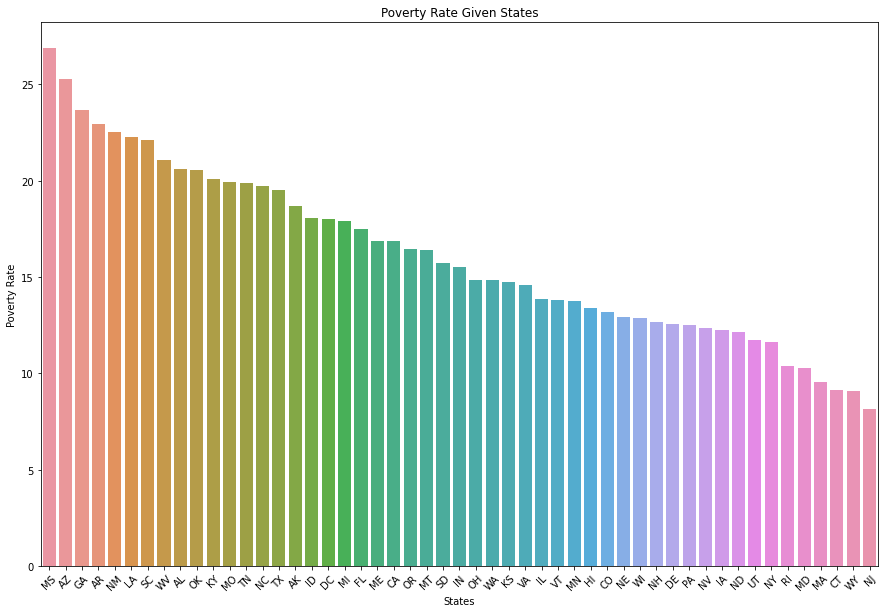

In [25]:
## Poverty rate of each state
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0, inplace=True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique()) #eyaletleri listeye ekledik

area_poverty_ratio = [] #proverty rate lere göre eyaletleri sıralıyoruz.
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
    
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio}) #dataframe oluşturuldu
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values #area_poverty_ratio'nun büyüktükten küçüğe sıralanması sonucu oluşan index değer sıralaması olan bir liste oluşturuldu.
sorted_data = data.reindex(new_index) #new_index'e göre yeniden sıralama yapıldı.

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

In [30]:
sorted_data

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675
18,LA,22.291772
40,SC,22.105556
48,WV,21.082222
0,AL,20.611795
36,OK,20.545895


In [29]:
new_index

array([24,  2, 10,  3, 31, 18, 40, 48,  0, 36, 17, 25, 42, 33, 43,  1, 12,
        8, 22,  9, 19,  4, 37, 26, 41, 14, 35, 47, 16, 46, 13, 45, 23, 11,
        5, 27, 49, 29,  7, 38, 28, 15, 34, 44, 32, 39, 20, 21,  6, 50, 30],
      dtype=int64)

In [28]:
data

,area_list,area_poverty_ratio
0,AL,20.611795
1,AK,18.678592
2,AZ,25.268071
3,AR,22.963216
4,CA,16.888371
5,CO,13.187773
6,CT,9.137500
7,DE,12.555844
8,DC,18.000000
9,FL,17.508606


In [27]:
area_poverty_ratio

[20.611794871794878,
 18.67859154929578,
 25.268070953436805,
 22.963216266173745,
 16.88837056504598,
 13.187772925764186,
 9.137499999999996,
 12.555844155844163,
 18.0,
 17.508605664488037,
 23.663636363636385,
 13.400662251655628,
 18.07621145374448,
 13.849342105263164,
 15.499852941176472,
 12.23154761904761,
 14.719047619047604,
 20.079999999999984,
 22.291772151898744,
 16.893846153846148,
 10.272393822393829,
 9.546341463414642,
 17.9007225433526,
 13.745736434108531,
 26.884254143646384,
 19.930687318489824,
 16.423287671232874,
 12.917413793103448,
 12.37099236641221,
 12.659793814432987,
 8.160917431192654,
 22.5076749435666,
 11.638963210702341,
 19.720568335588627,
 12.13192019950125,
 14.826666666666664,
 20.545895020188418,
 16.435809018567646,
 12.487173666288305,
 10.369444444444444,
 22.105555555555558,
 15.745268542199483,
 19.887209302325576,
 19.496222095020045,
 11.724615384615383,
 13.785950413223137,
 14.58583473861719,
 14.825996810207325,
 21.082222222222207,

In [8]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [9]:
kill.name.value_counts() #49 tane tk tk var ve bunları dahil etmeyeceğiz

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

In [10]:
# kill.name.value_counts()
["ali", "haydar"] #str.split isim soyismi ayırır

['ali', 'haydar']

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

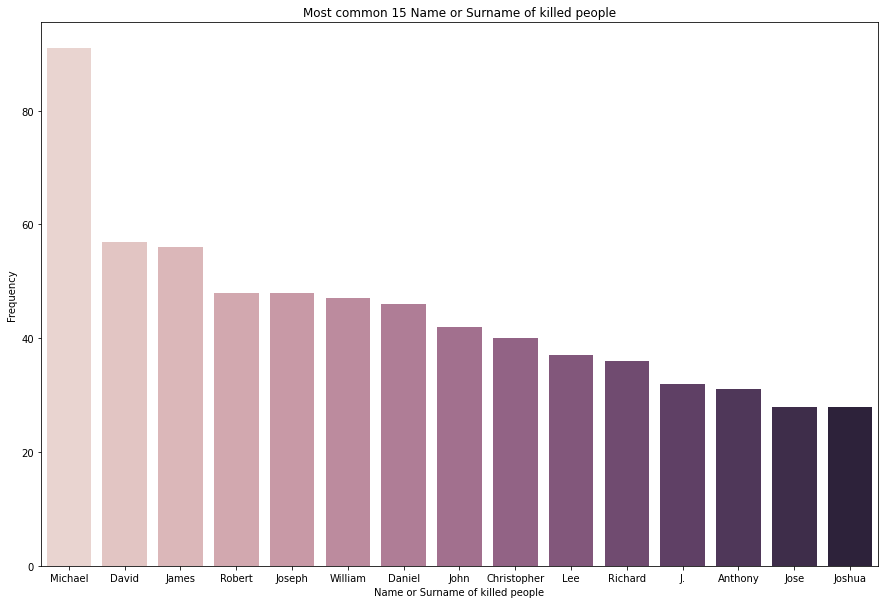

In [31]:
# Most common 15 Name or Surname of killed people
separate = kill.name[kill.name != 'TK TK'].str.split() 
a,b = zip(*separate) #ayrılan isimleri zipliyoruz
name_list = a+b #tuple olarak birleştiriyoruz                         
name_count = Counter(name_list)         
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)
# 
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x))) #palatte x uzunluğu kadar yakın renkleri barlar boyunca farklılaştırıyor
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

In [12]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [13]:
percent_over_25_completed_highSchool['percent_completed_hs'].value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [14]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

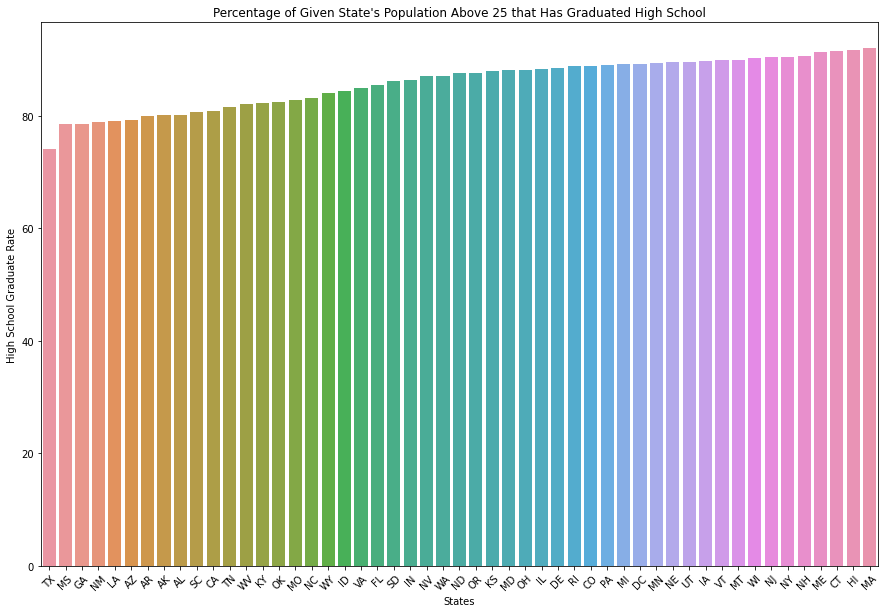

In [15]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool['percent_completed_hs'].replace(['-'],0.0,inplace=True)
percent_over_25_completed_highSchool['percent_completed_hs']=percent_over_25_completed_highSchool['percent_completed_hs'].astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i] #filter işlemi
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list':area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values #satır 55 ve 56 da neden iki kere indexlediği görülüyor
sorted_data2 = data.reindex(new_index)
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

In [16]:
new_index

array([43, 24, 10, 31, 18,  2,  3,  1,  0, 40,  4, 42, 48, 17, 36, 25, 33,
       50, 12, 46,  9, 41, 14, 28, 47, 34, 37, 16, 20, 35, 13,  7, 39,  5,
       38, 22,  8, 23, 27, 44, 15, 45, 26, 49, 30, 32, 29, 19,  6, 11, 21],
      dtype=int64)

In [17]:
sorted_data2

,area_list,area_highschool_ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363
2,AZ,79.218182
3,AR,79.949538
1,AK,80.098028
0,AL,80.163419
40,SC,80.645707


In [18]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [19]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [20]:
share_race_city['share_white'].value_counts()

100     1051
97.7     298
96.9     294
98.2     289
97.3     287
        ... 
21.8       1
13.3       1
9.3        1
20.7       1
36.3       1
Name: share_white, Length: 997, dtype: int64

[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races")]

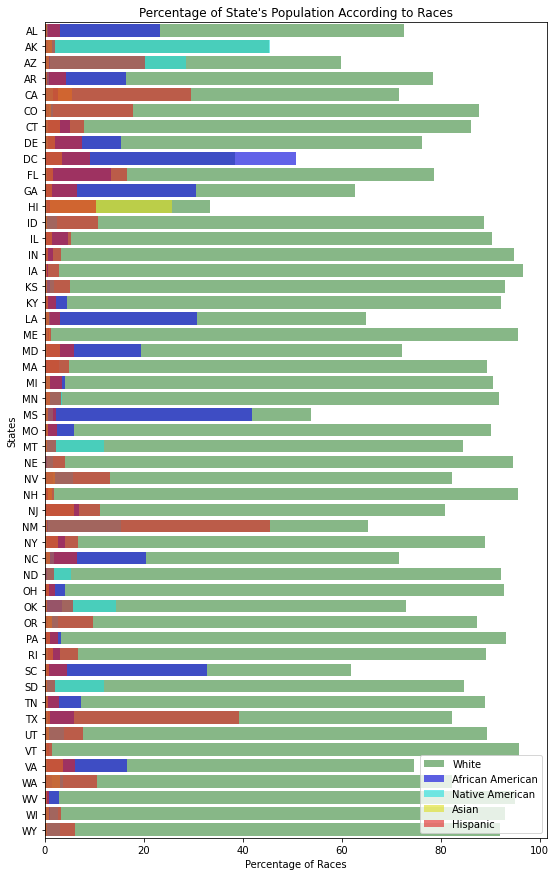

In [21]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
#tüm ırkları float'a çeviriyoruz
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))
    
# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' ) #alpha saydamlık değeri
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

ax.legend(loc='lower right',frameon = True)     # legendlarin dış çerçevesi
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races")

## Point Plot

In [22]:
sorted_data.head()

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [23]:
sorted_data2.head()

,area_list,area_highschool_ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


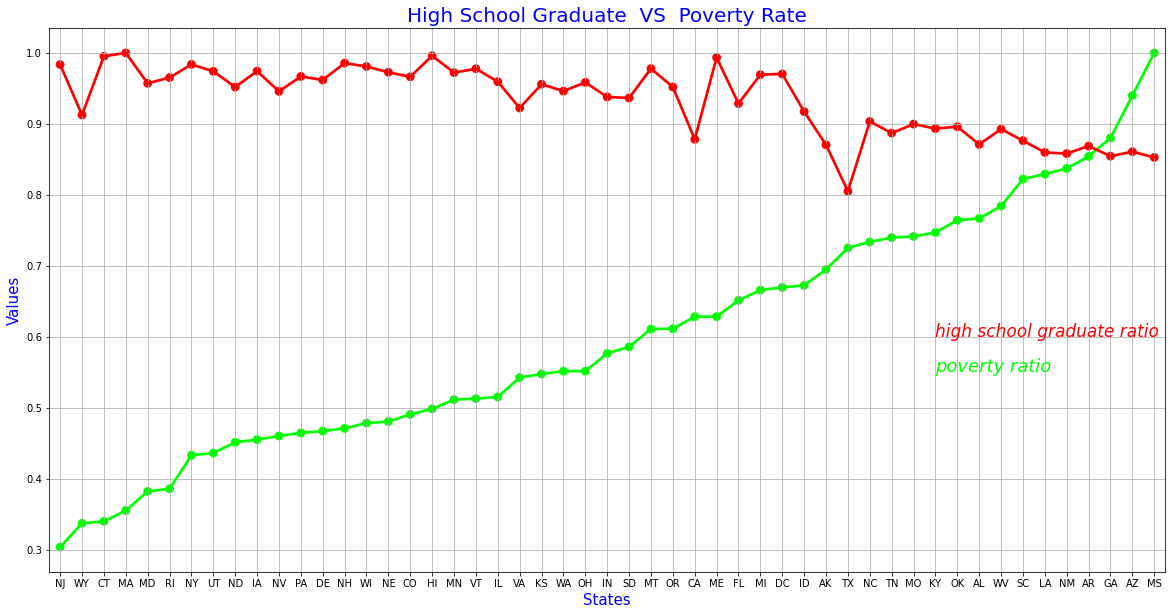

In [24]:
# high school graduation rate vs Poverty rate of each state
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio']) #normalize ediyoruz sayıları 0 1 arasına taşıyoruz

data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

## Joint Plot

In [25]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


In [28]:
import scipy.stats as stats


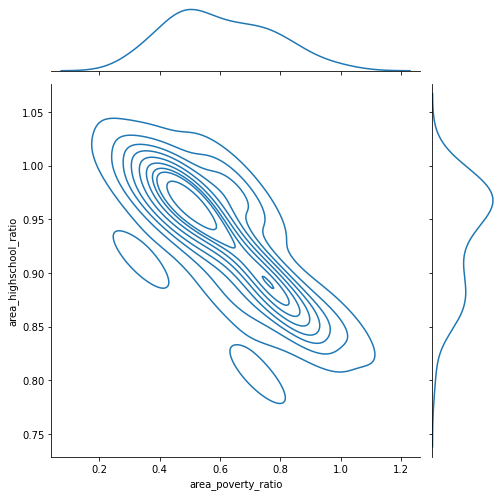

In [29]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7)
#stats.pearsonr koralasyonunu ekleyemedim
plt.savefig('graph.png') #kaggle gözükmesi için yazılmış
plt.show()

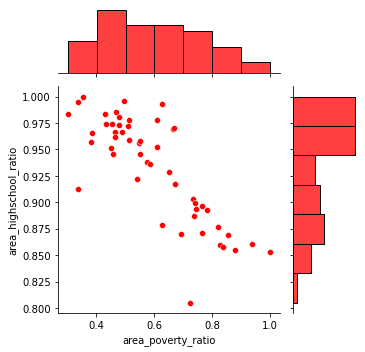

In [30]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,size=5, ratio=3, color="r")

## Pie Chart

In [31]:
# Race rates according in kill data 

In [32]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5, 1.0, 'Killed People According to Races')

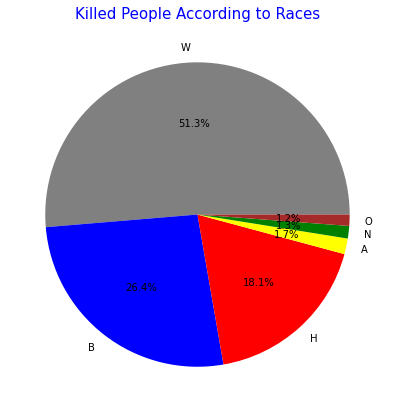

In [33]:
# Race rates according in kill data 
kill.race.dropna(inplace = True)
labels = kill.race.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

## Lm Plot

In [27]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


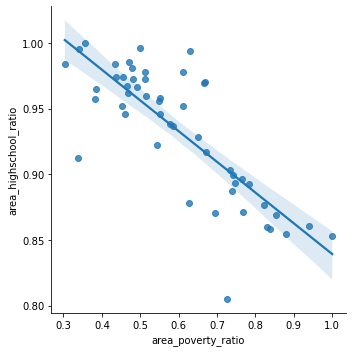

In [34]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()

## Kde Plot

In [35]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


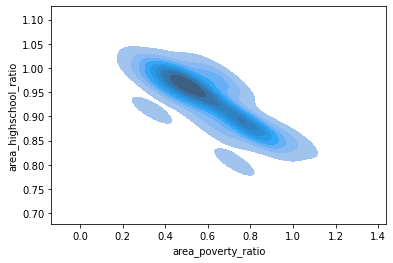

In [44]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# cubehelix plot
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=True, cut=5)
plt.show()

## Violin Plot

In [45]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


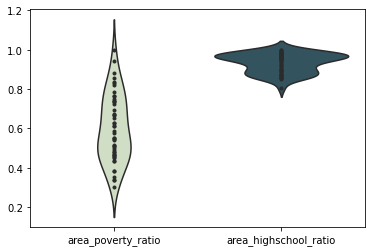

In [47]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3) #paletin rengini belirliyor, internette türlü türlü var
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

## Heatmap

In [50]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


In [51]:
data.corr() #korolasyon 1 çıkarsa doğru orantılıdır. 

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


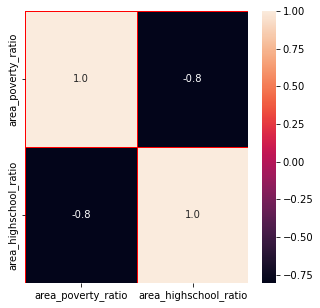

In [60]:
#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code

f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(),annot=True, linewidths=0.5,linecolor="red",fmt = '1.1f',ax=ax)
plt.show()

## Box Plot

In [61]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [62]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

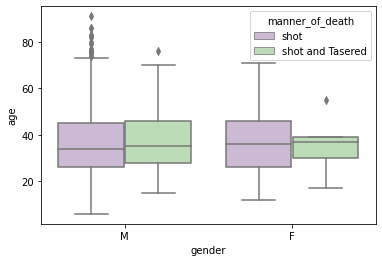

In [64]:
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
# Plot the orbital period with horizontal boxes
# Oluşan grafiğin üstündeki gri noktalar istisnaları oluşturuyor
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

## Swarm Plot

In [66]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas

In [65]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


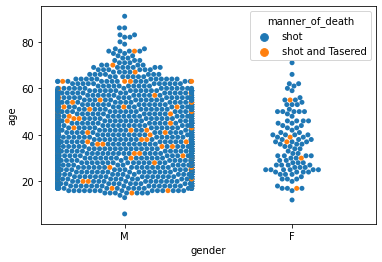

In [69]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
# data sayısı fazlaysa swarm çizmek pcyi zorlayacaktır
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()

## Pair Plot

In [70]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


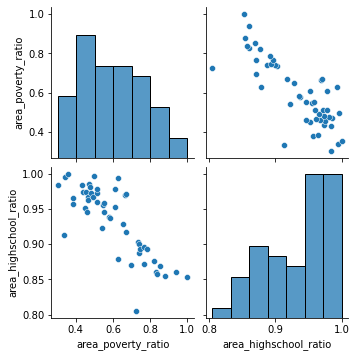

In [71]:
sns.pairplot(data)
plt.show()

## Count Plot

In [72]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [73]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

Text(0.5, 1.0, 'gender')

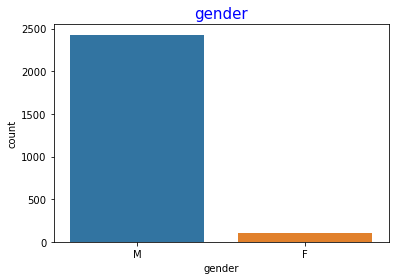

In [74]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Kill weapon')

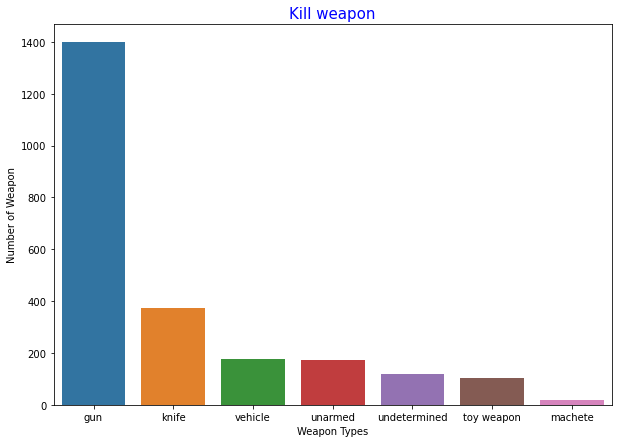

In [75]:
# kill weapon
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Race of killed people')

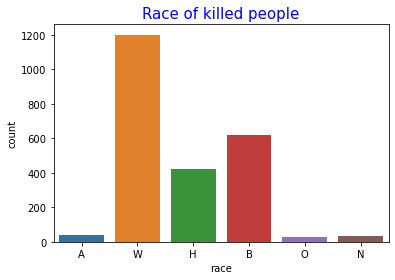

In [76]:
# Race of killed people
sns.countplot(data=kill, x='race')
plt.title('Race of killed people',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Most dangerous cities')

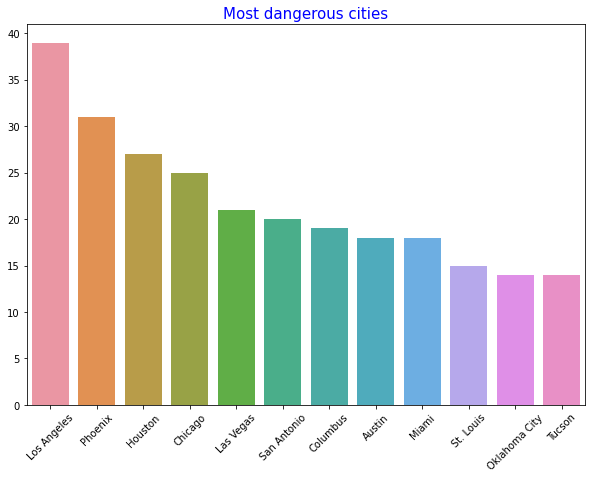

In [77]:
# Most dangerous cities
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Most dangerous state')

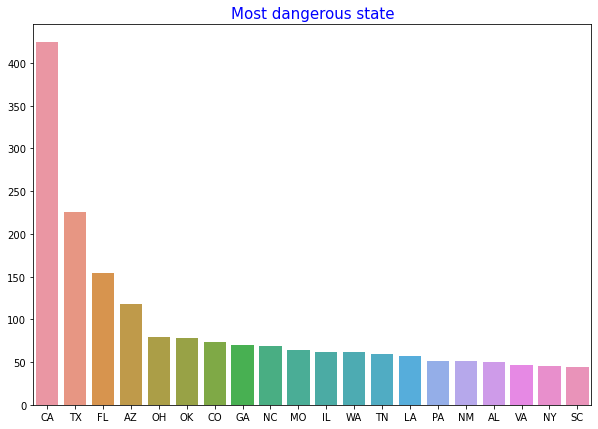

In [78]:
# most dangerous states
state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Most dangerous state',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Having mental illness or not')

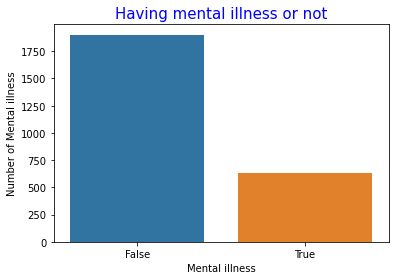

In [79]:
# Having mental ilness or not for killed people
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Threat types')

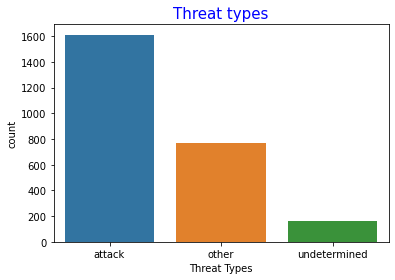

In [80]:
# Threat types
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Flee types')

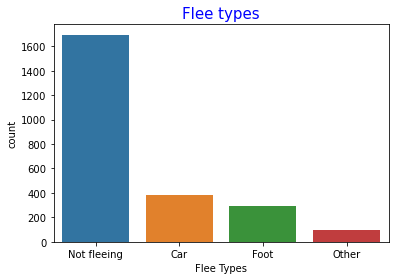

In [81]:
# Flee types
sns.countplot(kill.flee)
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Having body cameras or not on Police')

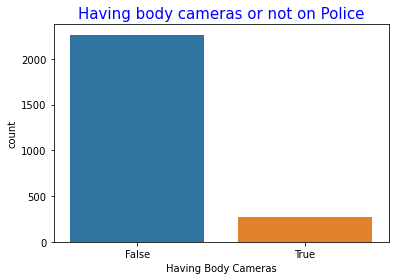

In [82]:
# Having body cameras or not for police
sns.countplot(kill.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)

Text(0.5, 1.0, 'Kill Numbers from States')

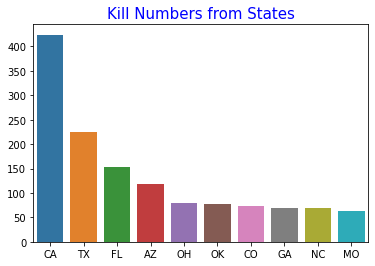

In [83]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)